# Exploratory Data Analysis


In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(rc={'axes.facecolor':'white'})


In [2]:
# import datasets
train_path = "../data/train.csv"

train_data = pd.read_csv(train_path)

In [3]:
# inspect dataset
train_data.columns

Index(['id', 'discourse_id', 'discourse_start', 'discourse_end',
       'discourse_text', 'discourse_type', 'discourse_type_num',
       'predictionstring'],
      dtype='object')

In [4]:
train_data.shape

(144293, 8)

In [5]:
train_data.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


### Check column data types and number of null entries.  

In this case, no null entries were found. The data is clean and ready to be used.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144293 entries, 0 to 144292
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  144293 non-null  object 
 1   discourse_id        144293 non-null  float64
 2   discourse_start     144293 non-null  float64
 3   discourse_end       144293 non-null  float64
 4   discourse_text      144293 non-null  object 
 5   discourse_type      144293 non-null  object 
 6   discourse_type_num  144293 non-null  object 
 7   predictionstring    144293 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


### List all discourse type names

In [7]:
types = list(set(train_data["discourse_type"]))
types_to_int = {'Rebuttal': 1, 'Position': 2, 'Claim': 3, 'Counterclaim': 4, 'Concluding Statement': 5, 'Lead': 6, 'Evidence': 7}
print(types_to_int)

{'Rebuttal': 1, 'Position': 2, 'Claim': 3, 'Counterclaim': 4, 'Concluding Statement': 5, 'Lead': 6, 'Evidence': 7}


<Figure size 1152x576 with 0 Axes>

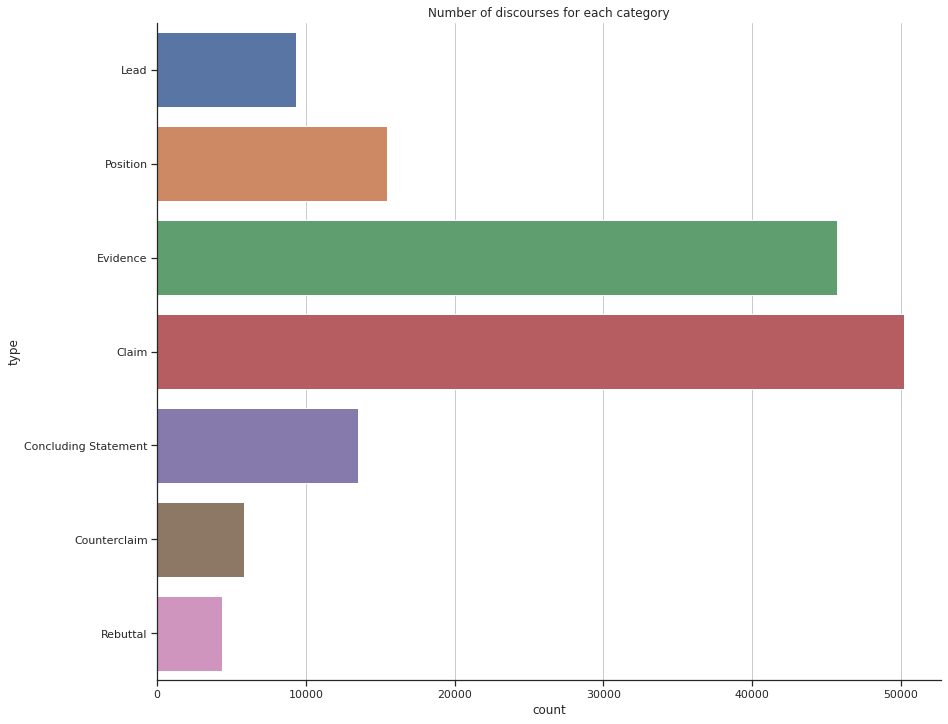

In [8]:
sns.set_style("ticks",{'axes.grid' : True})
plt.figure(figsize=(16,8))
fig = sns.catplot(y="discourse_type", data=train_data, kind="count" , height=10, aspect=4/3)
fig.set(
    title="Number of discourses for each category", ylabel="type", xlabel="count"
)
plt.show()

Most common discourse types are 'Claim' and 'Evidence'.
Least common types are 'Rebuttal' and 'Counterclaim'.

<AxesSubplot:>

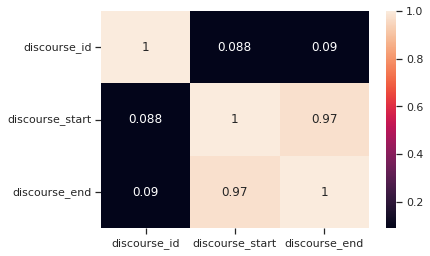

In [9]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True)

As expected, discourse_start and discourse_end are highly directly correlated.  
Since correlations can only be computed for numerical data, further steps are needed before we can extract any useful information (e.g. correlation between given sets of words and discourse type, or between length of a discourse and its type)

## Bag of Words Representation

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow_unprocessed = vectorizer.fit_transform(train_data['discourse_text'][:1000])
# not enough memory to run the above line of code without slicing the dataset

In [11]:
def explore_bow(bow, n_common_words=100):
  """
  print and plot most the most frequent n words in the text
  input: 
    bow = bag of words representation of text
    n_common_words = number of words that will be displayed in plots
  """
  bow_array = bow.toarray()
  bow_words = vectorizer.get_feature_names_out()
  bow_words = vectorizer.get_feature_names_out()

  frequencies = np.array([sum(x) for x in zip(*bow_array)])
  sorted_frequencies = np.sort(frequencies)
  # [::-1] reverses the array
  most_common_frequencies = sorted_frequencies[::-1][: n_common_words]
  sorted_frequency_indices = np.argsort(frequencies)
  most_common_indices = sorted_frequency_indices[::-1][: n_common_words]
  most_common_words = [bow_words[i] for i in most_common_indices]
  print('Most common words\n', most_common_words)

  # plots
  plt.figure(figsize=(16,24))
  plt.title('Frequencies of most common words')
  y_pos = np.arange(n_common_words)
  # Create horizontal bars
  plt.barh(y_pos, most_common_frequencies)
  # Create names on the x-axis
  plt.yticks(y_pos, most_common_words)
  plt.show()

### Most frequent words without preprocessing

Most common words
 ['the', 'to', 'and', 'driving', 'of', 'you', 'is', 'in', 'while', 'that', 'phone', 'it', 'be', 'on', 'are', 'your', 'can', 'people', 'phones', 'or', 'not', 'cell', 'their', 'they', 'have', 'for', 'texting', 'use', 'because', 'if', 'should', 'car', 'drivers', 'road', 'this', 'with', 'at', 'but', 'as', 'using', 'more', 'accidents', 'an', 'text', 'there', 'by', 'many', 'when', 'from', 'driver', 'one', 'get', 'also', 'time', 'just', 'cause', 'we', 'do', 'all', 'could', 'will', 'vehicle', 'so', 'dangerous', 'life', 'distracted', 'accident', 'drive', 'being', 'even', 'someone', 'has', 'other', 'lives', 'don', 'them', 'only', 'some', 'about', 'who', 'up', 'most', 'risk', 'any', 'law', 'able', 'attention', 'than', 'person', 'think', 'our', 'states', 'take', 'put', 'operating', 'call', 'was', 'need', 'would', 'why']


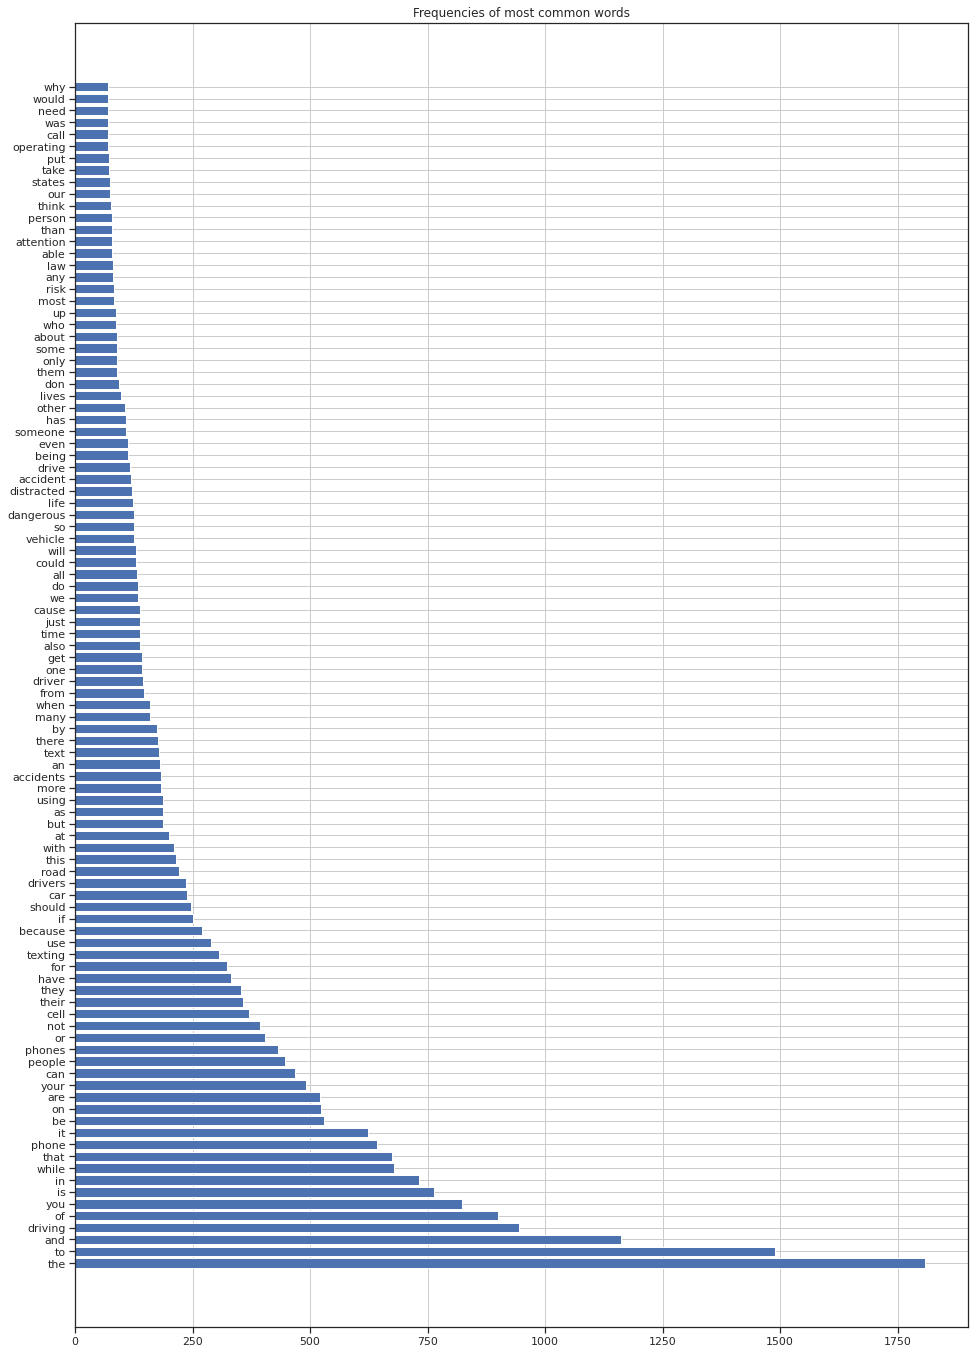

In [12]:
explore_bow(bow_unprocessed, 100)

- As expected, articles, prepositions and conjunctions are the most common words. Some oof these could be safely eliminated from the dataset (at least in the BOW representation) as they do not influence the discourse type. E.g. 'the', 'of', 'and'.
- Some other common words (e.g. 'driving', 'phone') are very common and topic specific. 
- Probably the most relevant words to infer the type of discourse are pronouns and conjunctions such as 'why' or 'because'. The confirm of refute their relevance it would be interesting to make a list of candidate word features and plot their frequencies against the discourse type. Also, compute the correlation between these words and discourse type.
- Some words appear in the list twice in the singular and plural form (e.g., 'phone', 'phones'). These could be safely merged into one form only.

# Correlation

In [13]:
def single_keyword_correlation(keyword):
  """ 
  Given a keyword, print the correlation between keyword occurrence and discourse type for each type
  Check both keyword and Keyword
  """
  # for reference:
  # types_to_int = {'Rebuttal': 1, 'Position': 2, 'Claim': 3, 'Counterclaim': 4, 'Concluding Statement': 5, 'Lead': 6, 'Evidence': 7}

  df = pd.DataFrame()

  # add a column for each discourse type
  for key, val in types_to_int.items():
    df[key] = [int(x == key) for x in train_data['discourse_type']]
  
  # add a column for the keyword
  df['Keyword'] = [int((keyword in x) or (keyword.capitalize() in x)) for x in train_data['discourse_text']]

  occurrences = df['Keyword'].sum()
  total = len(df)
  percent = occurrences/total

  print(f'sentences containing the keyword: {occurrences} out of {total}, ({percent: .3f}%)')

  # compute correlation
  correlation_matrix = df.corr()
  print(correlation_matrix[-1:])
  
  plt.figure(figsize=(10,3))
  plt.title(f'Keyword: {keyword}')
  sns.heatmap(correlation_matrix[-1:], annot=True)
  plt.show()
  

sentences containing the keyword: 9478 out of 144293, ( 0.066%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.016528 -0.022893 -0.090444     -0.022343               0.11035   

             Lead  Evidence  Keyword  
Keyword  0.013644  0.047028      1.0  


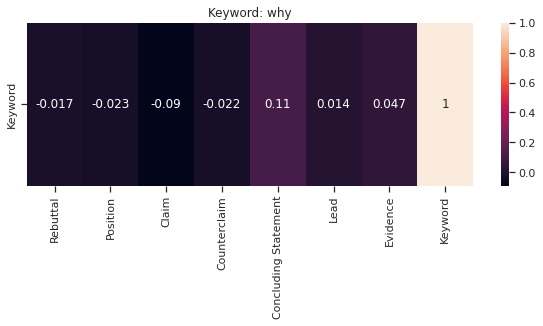

sentences containing the keyword: 26555 out of 144293, ( 0.184%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.020127  -0.09405 -0.111552     -0.017688              0.070035   

             Lead  Evidence  Keyword  
Keyword -0.045395  0.171661      1.0  


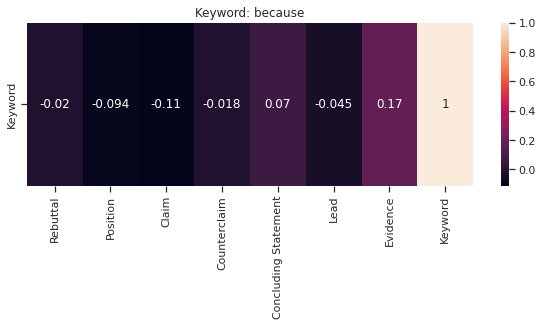

sentences containing the keyword: 3267 out of 144293, ( 0.023%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword  0.116455 -0.027312 -0.090158      0.030387             -0.003323   

             Lead  Evidence  Keyword  
Keyword  0.055257  0.027765      1.0  


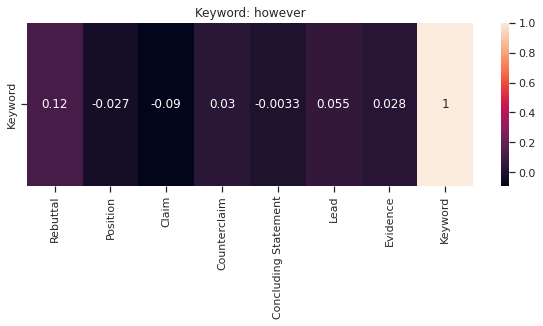

sentences containing the keyword: 1522 out of 144293, ( 0.011%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword  -0.00268 -0.019903 -0.056625     -0.014954              0.035763   

             Lead  Evidence  Keyword  
Keyword -0.010813   0.06182      1.0  


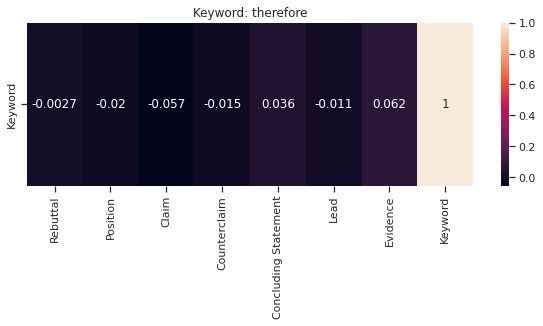

sentences containing the keyword: 57 out of 144293, ( 0.000%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.001457 -0.003489 -0.010861     -0.004074              0.001994   

           Lead  Evidence  Keyword  
Keyword  0.0033  0.012705      1.0  


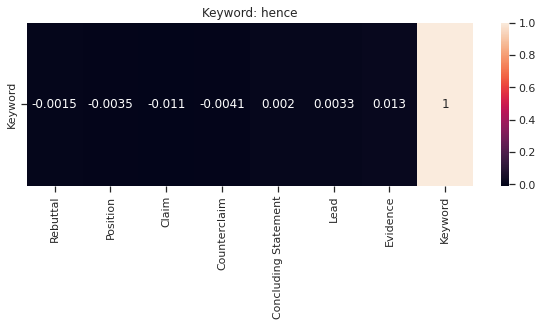

sentences containing the keyword: 69345 out of 144293, ( 0.481%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.043568 -0.167438 -0.238538      0.015546              0.098568   

             Lead  Evidence  Keyword  
Keyword  0.037169  0.283514      1.0  


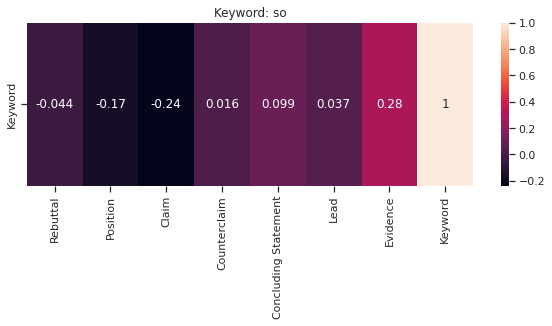

sentences containing the keyword: 8301 out of 144293, ( 0.058%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.000088  -0.02486 -0.094503     -0.007058              0.021875   

             Lead  Evidence  Keyword  
Keyword  0.038861  0.082073      1.0  


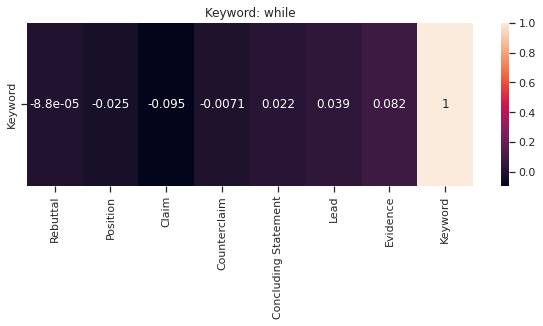

sentences containing the keyword: 1029 out of 144293, ( 0.007%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.012025 -0.027182 -0.008827     -0.015695              0.054205   

            Lead  Evidence  Keyword  
Keyword -0.00012  0.004264      1.0  


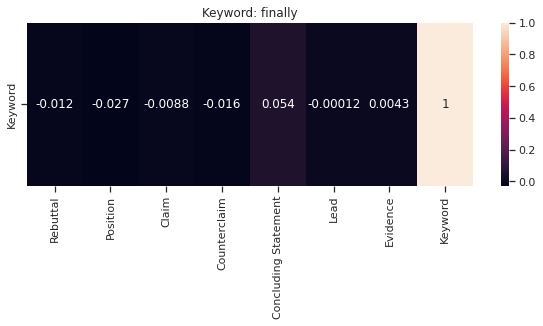

sentences containing the keyword: 77117 out of 144293, ( 0.534%)
         Rebuttal  Position     Claim  Counterclaim  Concluding Statement  \
Keyword -0.027414 -0.182035 -0.326034     -0.055582              0.177988   

             Lead  Evidence  Keyword  
Keyword  0.033316  0.359249      1.0  


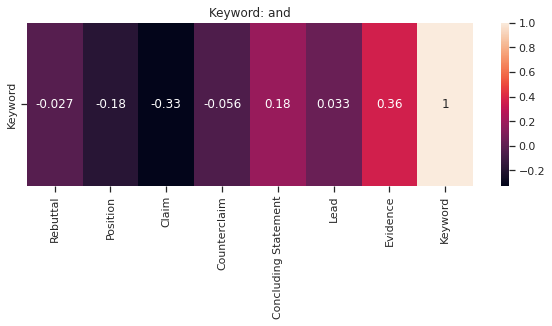

In [14]:
keyword_list = ['why', 'because', 'however', 'therefore', 'hence', 'so', 'while', 'finally', 'and']

for keyword in keyword_list:
  single_keyword_correlation(keyword)


- Correlation factors of the words in the list above are more meaningful if case insensitive
- Some words are surprisingly irrelevant on their own: 'finally', 'while', 'therefore', 'hence'. This probably depends on the nature of the data: for example, student essays and scientific articles use different vocabulary
- 'and', 'so', 'because' are decent predictors for 'Evidence'
- 'however' is a decent predictor for 'Rebuttal'
- 'why' is a decent predictor for 'Concluding Statement'
- Other discourse types are harder to infer from the list of words above
- The above results could be improved by:
  - cleaning the data before computing correlations (i.e. lowercase, removing punctuation, lemmization)
  - computing multivariate covariance to see if combinations of words can be better predictors

Next:
- [ ] try some data cleaning with the sklearn library pre-made functions
- [x] make a list of word features and compute correlation with discourse type
- [x] refactor the code into functions so that the whole pipeline can be easily applied to other slices of the dataset
- [ ] try another data structure (n-graph)